In [1]:
import ROOT as rt

Welcome to JupyROOT 6.24/02


In [2]:
input_file = rt.TFile("../online/output/MassOut.root")
input_list = input_file.Get("h-lambda")
c = rt.TCanvas("main")

In [3]:
single_dist = input_list.FindObject("fLambdaDist")
triggered_single_dist = input_list.FindObject("fTriggeredLambdaDist")
clone_triggered_single_dist = input_list.FindObject("fTriggeredLambdaDist").Clone("clone_triggered_single_dist")

cor_dist = input_list.FindObject("fDphiHLambda")
rot_cor_dist = input_list.FindObject("fDphiHLambdaRotated")
ls_cor_dist = input_list.FindObject("fDphiHLambdaLS")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: big_c


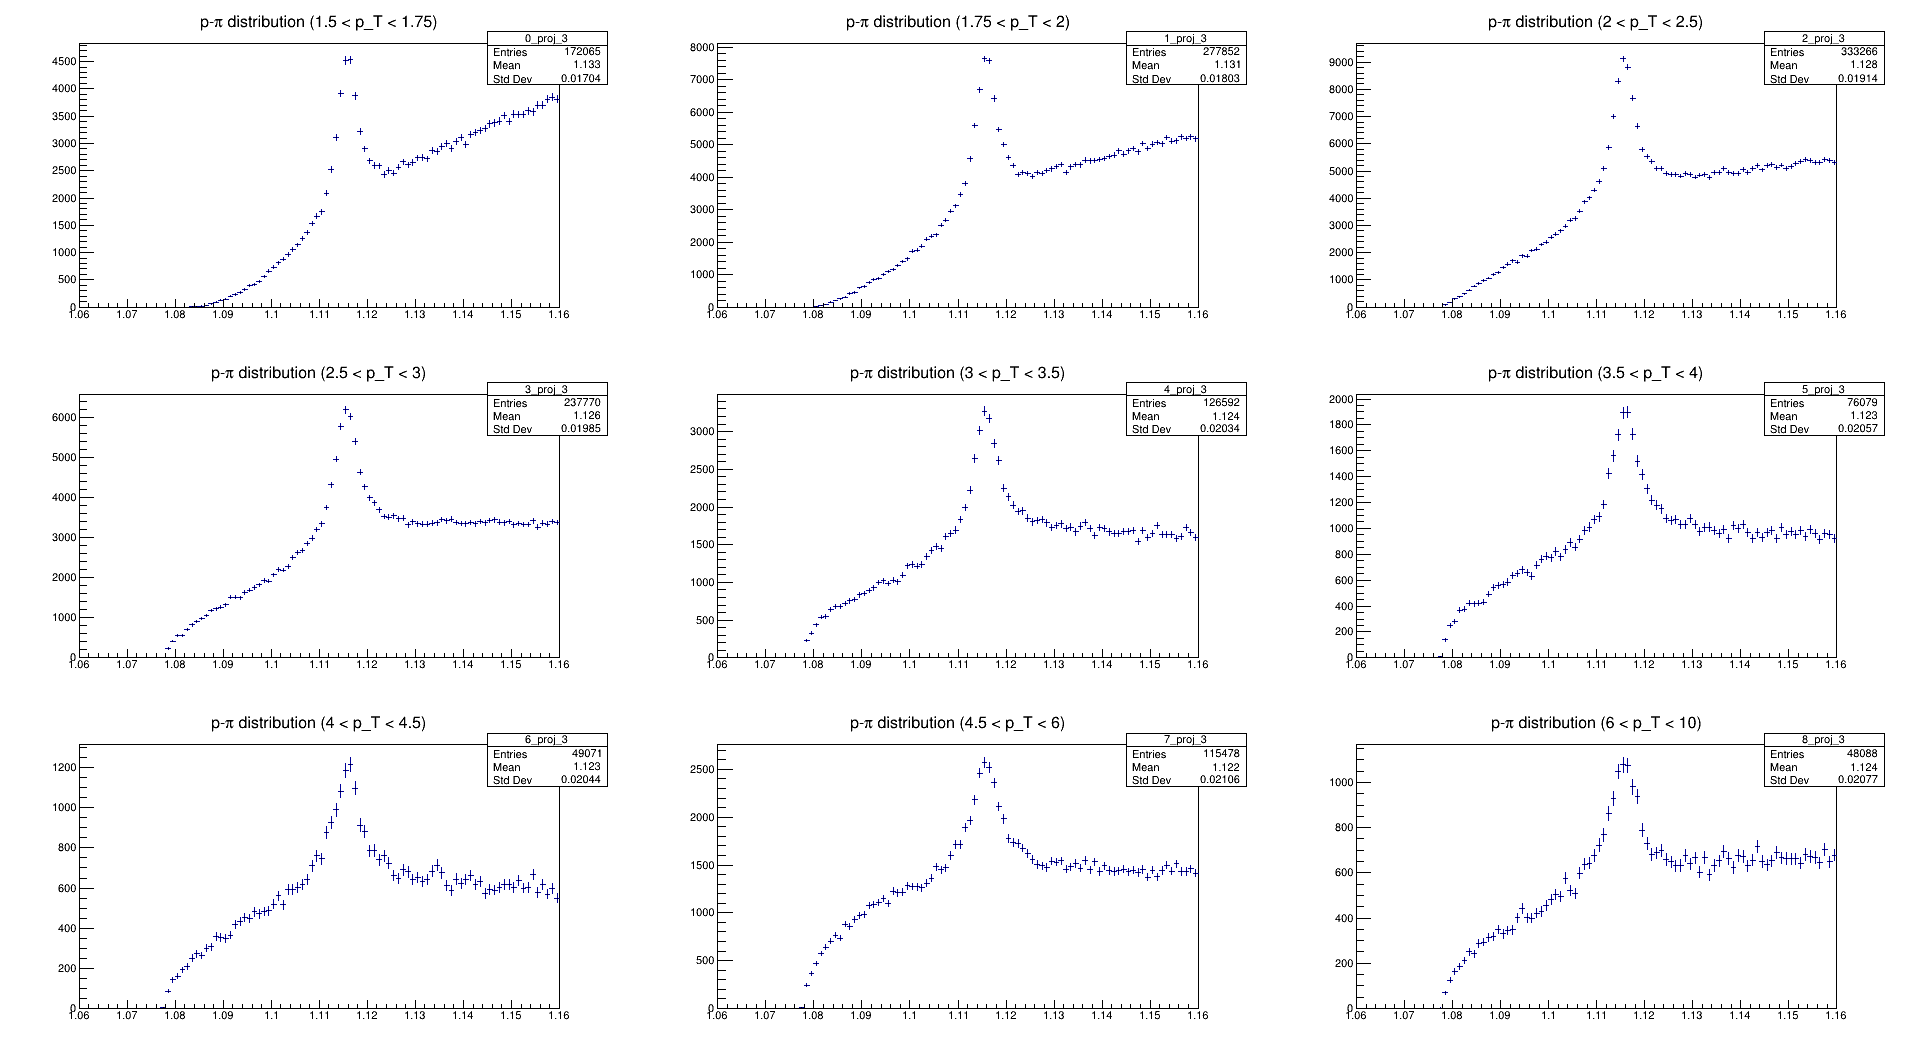

In [14]:
pt_ranges = [1.5, 1.75, 2, 2.5, 3, 3.5, 4, 4.5, 6, 10]
big_c = rt.TCanvas("big_c", "Big C", 0, 10, 1920, 1080)
big_c.Divide(3, 3)

for i in range(len(pt_ranges)-1):
    big_c.cd(i+1)
    clone_triggered_single_dist.GetAxis(0).SetRangeUser(pt_ranges[i], pt_ranges[i+1])
    #clone_triggered_single_dist.Projection(3).SetTitle(f"p-#pi distribution ({pt_ranges[i]} < p_T < {pt_ranges[i+1]})")
    test = clone_triggered_single_dist.Clone(f"{i}").Projection(3)
    test.Sumw2()
    test.SetTitle(f"p-#pi distribution ({pt_ranges[i]} < p_{T} < {pt_ranges[i+1]})")
    test.Draw()
    big_c.Draw()

In [15]:
single_dist.GetAxis(0).SetRangeUser(2, 4)
triggered_single_dist.GetAxis(0).SetRangeUser(3.5, 4)

cor_dist.GetAxis(0).SetRangeUser(4, 8)
cor_dist.GetAxis(1).SetRangeUser(2, 4)

ls_cor_dist.GetAxis(0).SetRangeUser(4, 8)
ls_cor_dist.GetAxis(1).SetRangeUser(2, 4)

rot_cor_dist.GetAxis(0).SetRangeUser(4, 8)
rot_cor_dist.GetAxis(1).SetRangeUser(2, 4)

In [ ]:
mass_dist = single_dist.Projection(3).Clone("mass_dist")
triggered_mass_dist = triggered_single_dist.Projection(3).Clone("triggered_mass_dist")
cor_mass_dist = cor_dist.Projection(4).Clone("cor_mass_dist")
ls_cor_mass_dist = ls_cor_dist.Projection(4).Clone("ls_cor_mass_dist")
rot_cor_mass_dist = rot_cor_dist.Projection(4).Clone("rot_cor_mass_dist")

In [ ]:
mass_dist.Sumw2()
mass_dist.SetTitle("Single-particle #Lambda^{0} candidate mass distribution (2 GeV < p_{T} < 4 GeV)") 
mass_dist.GetXaxis().SetTitle("Mass (GeV)")
mass_dist.GetYaxis().SetTitle("dN_{p-#pi}/dM")
mass_dist.SetLineColor(rt.kBlue)

In [ ]:
triggered_mass_dist.Sumw2()
triggered_mass_dist.SetTitle("Triggered #Lambda^{0} candidate mass distribution (2 GeV < p_{T} < 4 GeV)") 
triggered_mass_dist.GetXaxis().SetTitle("Mass (GeV)")
triggered_mass_dist.GetYaxis().SetTitle("dN_{p-#pi}/dM")
triggered_mass_dist.SetLineColor(rt.kRed)

In [ ]:
cor_mass_dist.Sumw2()
cor_mass_dist.SetTitle("h-#Lambda^{0} candidate mass distribution (2 GeV < p_{T} < 4 GeV)") 
cor_mass_dist.GetXaxis().SetTitle("Mass (GeV)")
cor_mass_dist.GetYaxis().SetTitle("dN_{p-#pi}/dM")
cor_mass_dist.SetLineColor(rt.kBlue)

In [ ]:
ls_cor_mass_dist.Sumw2()
ls_cor_mass_dist.SetTitle("h-#Lambda^{0} LS candidate mass distribution (2 GeV < p_{T} < 4 GeV)") 
ls_cor_mass_dist.GetXaxis().SetTitle("Mass (GeV)")
ls_cor_mass_dist.GetYaxis().SetTitle("dN_{p-#pi}/dM")
ls_cor_mass_dist.SetLineColor(rt.kBlue)

In [ ]:
rot_cor_mass_dist.Sumw2()
rot_cor_mass_dist.SetTitle("h-#Lambda^{0} rotated daughter candidate mass distribution (2 GeV < p_{T} < 4 GeV)") 
rot_cor_mass_dist.GetXaxis().SetTitle("Mass (GeV)")
rot_cor_mass_dist.GetYaxis().SetTitle("dN_{p-#pi}/dM")
rot_cor_mass_dist.SetLineColor(rt.kMagenta)

In [ ]:
mass_dist.Draw()
c.Draw()

In [ ]:
cor_mass_dist.Draw()
c.Draw()

In [ ]:
rot_cor_mass_dist.Rebin(2)
triggered_mass_dist.Rebin(2)

In [ ]:
ls_cor_mass_dist.Rebin(2)

In [ ]:
triggered_mass_dist.Draw()
c.Draw()

In [ ]:
left_bin_val = 1.08
right_bin_val = 1.1
left_bin = triggered_mass_dist.FindBin(left_bin_val)
right_bin = triggered_mass_dist.FindBin(right_bin_val)

rot_cor_mass_dist.Scale(1/rot_cor_mass_dist.Integral())
ls_cor_mass_dist.Scale(1/ls_cor_mass_dist.Integral())
print(right_bin)
og_int = triggered_mass_dist.Integral(left_bin, right_bin)
rot_int = rot_cor_mass_dist.Integral(left_bin, right_bin)
ls_int = ls_cor_mass_dist.Integral(left_bin, right_bin)
print(og_int, triggered_mass_dist.Integral())

rot_scale_factor = og_int/rot_int
ls_scale_factor = og_int/ls_int
rot_cor_mass_dist.Scale(rot_scale_factor)
ls_cor_mass_dist.Scale(ls_scale_factor)

In [ ]:
triggered_mass_dist.Draw()
rot_cor_mass_dist.Draw("SAME")
ls_cor_mass_dist.Draw("SAME")
c.Draw()

In [ ]:
rot_cor_mass_dist.Draw()
c.Draw()

In [ ]:
mass_dist.Rebin(2)

In [ ]:
bg_fit = rt.TF1("bg_fit", "pol2", 1.08, 1.15)
rot_cor_mass_dist.Fit(bg_fit, "RS")
rot_cor_mass_dist.Draw()
c.Draw()

In [ ]:
# g_fit = rt.TF1("g_fit", "gaus(0) + pol3(3)", 1.1, 1.14)
g_fit = rt.TF1("g_fit", "gaus(0) + pol2(3)", 1.085, 1.15)
full_g_fit = rt.TF1("g_fit", "gaus(0) + pol4(3)", 1.08, 1.16)
v_fit = rt.TF1("v_fit", "[0]*TMath::Voigt(x - [1], [2], [3], 4) + pol2(4)", 1.09, 1.15)

In [ ]:
g_fit.SetNpx(1000)
g_fit.FixParameter(0, 18000)
g_fit.SetParameter(1, 1.115)
g_fit.SetParameter(2, 0.002)
g_fit.SetParameter(3, bg_fit.GetParameter(0) + 1000)
g_fit.SetParameter(4, bg_fit.GetParameter(1))
g_fit.SetParameter(5, bg_fit.GetParameter(2))

In [ ]:
triggered_mass_dist.Fit(g_fit, "RS")

In [ ]:
g_fit.SetLineColor(rt.kBlue)
triggered_mass_dist.Draw()
g_fit.Draw("SAME")
c.Draw()

In [ ]:
full_g_fit.SetParameter(0, g_fit.GetParameter(0))
full_g_fit.SetParameter(1, g_fit.GetParameter(1))
full_g_fit.SetParameter(2, g_fit.GetParameter(2))
full_g_fit.SetParameter(3, g_fit.GetParameter(3))
full_g_fit.SetParameter(4, g_fit.GetParameter(4))
full_g_fit.SetParameter(5, g_fit.GetParameter(5))
full_g_fit.SetParameter(6, g_fit.GetParameter(6))
full_g_fit.SetParameter(7, g_fit.GetParameter(7))

In [ ]:
bin_1 = mass_dist.FindBin(1.09)
bin_2 = mass_dist.FindBin(1.10)
bin_3 = mass_dist.FindBin(1.14)

print(mass_dist.GetBinContent(bin_1))
print(mass_dist.GetBinContent(bin_2))
print(mass_dist.GetBinContent(bin_3))

In [ ]:
mass_dist.Draw()
full_g_fit.Draw("SAME")
c.Draw()

In [ ]:
breit_wigner = rt.TF1("bw_contribution", "TMath::BreitWigner(x, 0, 6.53606e-3)", -0.1, 0.1)
gaussian = rt.TF1("gaussian_contribution", "TMath::Gaus(x, 0, 4.15882e-6, true)", -0.1, 0.1)

In [ ]:
breit_wigner.SetNpx(1000000)
gaussian.SetNpx(100000)
breit_wigner.SetTitle("Breit-Wigner (blue) vs. Gaus (red)")
breit_wigner.SetLineColor(rt.kBlue)
gaussian.SetLineColor(rt.kRed)

In [ ]:
breit_wigner.Draw()
gaussian.Draw("SAME")
c.Draw()